In [1]:
import biosppy
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pylab as plt

首先导入必要的库，其中核心库为biosppy，这个库用来检测信号中的R波波峰，供心率计算使用

In [2]:
demo_normal_path = 'E:/学习资料/大三上/信号处理/training2017/filtered_signals/N-A00001.mat'
demo_afib_path = 'E:/学习资料/大三上/信号处理/training2017/filtered_signals/A-A00009.mat'
normal_signal = loadmat(demo_normal_path)['val'].astype('float64')
afib_signal = loadmat(demo_afib_path)['val'].astype('float64')
Fs = 300.0 # 采样频率300Hz
n1 = len(normal_signal)
n2 = len(afib_signal)
normal_signal = normal_signal.reshape(n1,)
afib_signal = afib_signal.reshape(n2,)
ts1 = np.linspace(0, (n1 - 1) / Fs, n1)
ts2 = np.linspace(0, (n2 - 1) / Fs, n2)
print('Sampling Frequency of ECG Signals is %.f Hz' % Fs)
print('The length of normal signal is %d points.' % n1)
print('The length of Afib signal is %d points.' % n2)
print('The duration of normal signal is %.2f seconds.' % ts1[-1])
print('The duration of normal signal is %.2f seconds.' % ts2[-1])

Sampling Frequency of ECG Signals is 300 Hz
The length of normal signal is 8889 points.
The length of Afib signal is 8889 points.
The duration of normal signal is 29.63 seconds.
The duration of normal signal is 29.63 seconds.


信号采样频率300Hz;  
正常信号的长度为n1点，n1=8999;  
Afib信号长度为n2点，n2=8999;  
通过采样频率把信号长度转换为信号持续时间  
$$ t = (N - 1) / {f_s} $$

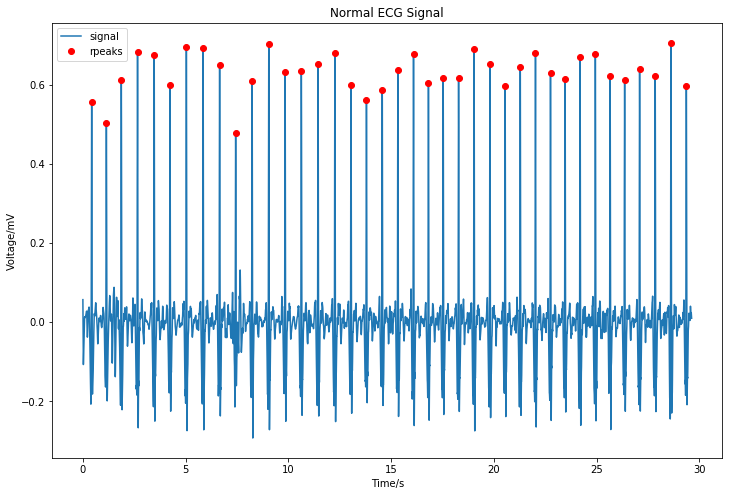

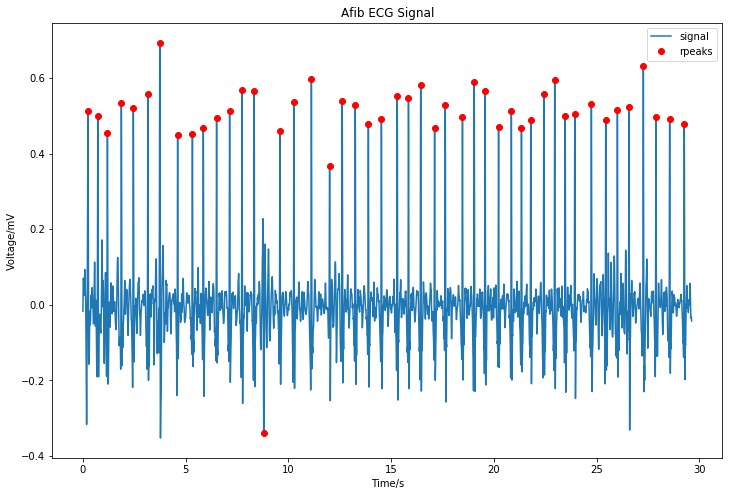

In [3]:
normal_rpeaks = biosppy.signals.ecg.hamilton_segmenter(signal=normal_signal, sampling_rate=Fs)['rpeaks']
afib_rpeaks = biosppy.signals.ecg.hamilton_segmenter(signal=afib_signal, sampling_rate=Fs)['rpeaks']
plt.figure(figsize=(12, 8))
plt.plot(ts1, normal_signal)
plt.plot(normal_rpeaks / Fs, normal_signal[normal_rpeaks], 'ro')
plt.xlabel('Time/s')
plt.ylabel('Voltage/mV')
plt.title('Normal ECG Signal')
plt.legend(['signal', 'rpeaks'])
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(ts2, afib_signal)
plt.plot(afib_rpeaks / Fs, afib_signal[afib_rpeaks], 'ro')
plt.xlabel('Time/s')
plt.ylabel('Voltage/mV')
plt.title('Afib ECG Signal')
plt.legend(['signal', 'rpeaks'])
plt.show()

使用Hamilton算法分割R峰，并用红点标记在原始图像上，可以看到算法获得的R峰准确度较高（可能会有少量错误分割）

In [4]:
normal_avg_heart_rate = len(normal_rpeaks) / ts1[-1] * 60
afib_avg_heart_rate = len(afib_rpeaks) / ts2[-1] * 60
print('The average heart rate of normal signal is %.2f bpm.' % normal_avg_heart_rate)
print('The average heart rate of Afib signal is %.2f bpm.' % afib_avg_heart_rate)

The average heart rate of normal signal is 78.98 bpm.
The average heart rate of Afib signal is 95.18 bpm.


分割出R峰后，函数的返回值是每个R峰的标记位置，所以计算平均心率  
$$ Avg Heart Rate = 60 * len(Rpeaks) / \Delta t $$

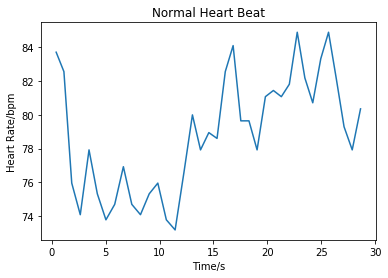

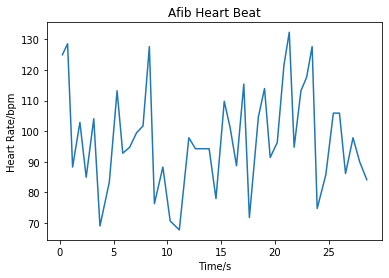

In [5]:
diff_normal_rpeaks = np.diff(normal_rpeaks)
diff_afib_rpeaks = np.diff(afib_rpeaks)
normal_heart_rate = 60 * Fs / diff_normal_rpeaks
afib_heart_rate = 60 * Fs / diff_afib_rpeaks
normal_heart_rate_ts = normal_rpeaks[0:-1] / Fs
afib_heart_rate_ts = afib_rpeaks[0:-1] / Fs
plt.figure()
plt.plot(normal_heart_rate_ts, normal_heart_rate)
plt.xlabel('Time/s')
plt.ylabel('Heart Rate/bpm')
plt.title('Normal Heart Beat')
plt.show()

plt.figure()
plt.plot(afib_heart_rate_ts, afib_heart_rate)
plt.xlabel('Time/s')
plt.ylabel('Heart Rate/bpm')
plt.title('Afib Heart Beat')
plt.show()

瞬时心率的计算思路是，对返回的Rpeaks求一阶差分，一阶差分即是每两次心跳之间的时间间隔，由此可以计算出每次心跳时间点的瞬时心率  
$$ InstantHeartRate = \frac {60 * {f_s}} {\Delta Rpeaks} $$